In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel("student_clustering.xlsx")

In [3]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [4]:
df.isnull().sum()

cgpa    0
iq      0
dtype: int64

In [5]:
df.shape

(200, 2)

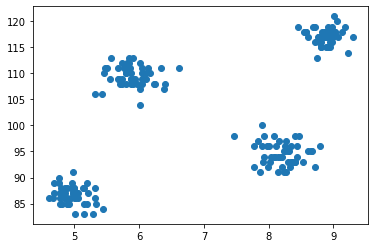

In [9]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'], df['iq'])

In [10]:
from sklearn.cluster import KMeans

elbo method 

In [11]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

In [13]:
wcss

[29957.898287999997,
 4184.141270000001,
 2362.713349,
 681.96966,
 514.1616803171114,
 420.74846722383256,
 295.43918959431915,
 234.4868734319922,
 203.0142356264366,
 176.56993298346393]

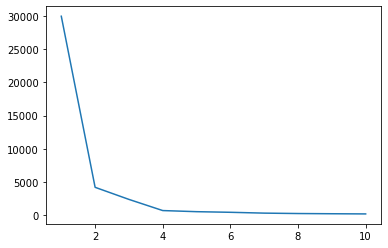

In [14]:
plt.plot(range(1,11),wcss)

In [17]:
km = KMeans(n_clusters=4)
y_means = km.fit_predict(df)

In [31]:
y_means

array([0, 1, 2, 2, 1, 1, 2, 3, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0,
       2, 0, 0, 2, 0, 3, 2, 1, 3, 1, 3, 1, 2, 2, 3, 1, 0, 1, 0, 2, 2, 0,
       3, 3, 2, 1, 3, 1, 0, 0, 3, 2, 3, 1, 1, 3, 1, 3, 1, 2, 2, 3, 0, 3,
       2, 0, 1, 2, 1, 3, 2, 0, 1, 3, 1, 3, 0, 2, 2, 3, 1, 0, 3, 0, 3, 1,
       3, 1, 3, 3, 2, 0, 2, 2, 3, 2, 0, 3, 1, 0, 0, 3, 0, 0, 2, 0, 3, 3,
       2, 3, 1, 1, 2, 3, 2, 1, 3, 0, 0, 1, 2, 3, 2, 0, 2, 1, 0, 2, 2, 1,
       0, 0, 1, 3, 1, 0, 2, 2, 2, 0, 1, 0, 0, 3, 0, 3, 1, 0, 3, 0, 3, 3,
       0, 2, 1, 3, 1, 2, 0, 3, 1, 2, 3, 0, 1, 0, 0, 3, 3, 1, 3, 0, 0, 2,
       3, 1, 0, 3, 3, 1, 1, 1, 2, 0, 2, 2, 3, 1, 2, 2, 0, 0, 2, 0, 3, 1,
       1, 3], dtype=int32)

In [25]:
X = df.values

In [35]:
X[y_means==3,0]

array([8.8 , 9.18, 8.86, 8.83, 8.56, 8.96, 8.78, 8.45, 8.79, 8.81, 8.88,
       9.07, 8.92, 8.75, 8.71, 8.86, 9.3 , 9.01, 8.97, 9.  , 8.76, 8.78,
       9.23, 9.03, 9.13, 8.91, 8.98, 9.03, 8.86, 8.89, 8.97, 8.72, 8.93,
       8.58, 8.94, 8.6 , 8.77, 8.81, 8.54, 8.97, 8.91, 8.68, 9.06, 8.9 ,
       8.94, 8.91, 8.91, 8.95, 8.57, 8.82])

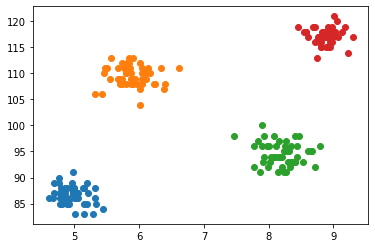

In [32]:
plt.scatter(X[y_means==0,0], X[y_means==0,1])
plt.scatter(X[y_means==1,0], X[y_means==1,1])
plt.scatter(X[y_means==2,0], X[y_means==2,1])
plt.scatter(X[y_means==3,0], X[y_means==3,1])

K-Means on 3-D Data

In [37]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [38]:
print(X)

[[ 4.33424548  3.32580419 -4.17497018]
 [-3.32246719  3.22171129 -4.625342  ]
 [-6.07296862 -4.13459237  2.6984613 ]
 [ 6.90465871  6.1110567  -4.3409502 ]
 [-2.60839207  2.95015551 -2.2346649 ]
 [ 5.88490881  4.12271848 -5.86778722]
 [-4.68484061 -4.15383935  4.14048406]
 [-1.82542929  3.96089238 -3.4075272 ]
 [-5.34385368 -4.95640314  4.37999916]
 [ 4.91549197  4.70263812 -4.582698  ]
 [-3.80108212 -4.81484358  4.62471505]
 [ 4.6735005   3.65732421 -3.88561702]
 [-6.23005814 -4.4494625   5.79280687]
 [-3.90232915  2.95112294 -4.6949209 ]
 [ 3.72744124  5.31354772 -4.49681519]
 [-3.3088472   3.05743945 -3.81896126]
 [ 2.70273021 -2.21732429  3.17390257]
 [ 4.06438286 -0.36217193  3.214466  ]
 [ 4.69268607 -2.73794194  5.15528789]
 [ 4.1210827  -1.5438783   3.29415949]
 [-6.61577235 -3.87858229  5.40890054]
 [ 3.05777072 -2.17647265  3.89000851]
 [-1.48617753  0.27288737 -5.6993336 ]
 [-5.3224172  -5.38405435  6.13376944]
 [-5.26621851 -4.96738545  3.62688268]
 [ 5.20183018  5.66102029

In [42]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y= X[:,1],z=X[:,2])
fig.show()

In [43]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

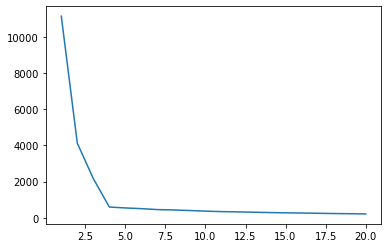

In [44]:
plt.plot(range(1,21),wcss)

In [45]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [46]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [47]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()